In [ ]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import spacy
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
pip install nltk

In [ ]:
df = pd.read_csv('email.csv')
print(df.head())
print("\nDescribing the data")
print(df.describe())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Describing the data
              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [ ]:
def clean_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(clean_text)

<ipython-input-39-7cb6caa86bb6>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
pip install demoji

In [ ]:
import demoji

In [ ]:
def remove_emojis(text):
    return demoji.replace(text,'')

df['text'] = df['text'].apply(remove_emojis)
print(df['text'].head())


0    subject naturally irresistible your corporate ...
1    subject the stock trading gunslinger  fanny is...
2    subject unbelievable new homes made easy  im w...
3    subject 4 color printing special  request addi...
4    subject do not have money  get software cds fr...
Name: text, dtype: object


In [ ]:
def tokenize_text(text): #Q1
    words = word_tokenize(text)
    return words
df['tokenized_email_body'] = df['text'].apply(tokenize_text)

In [ ]:
print("Tokenized Email Body:")
print(df['tokenized_email_body'].head())

Tokenized Email Body:
0    [subject, naturally, irresistible, your, corpo...
1    [subject, the, stock, trading, gunslinger, fan...
2    [subject, unbelievable, new, homes, made, easy...
3    [subject, 4, color, printing, special, request...
4    [subject, do, not, have, money, get, software,...
Name: tokenized_email_body, dtype: object


In [ ]:
from collections import Counter
from nltk.util import ngrams

In [ ]:
def extract_bigrams(tokens):
    bigrams = list(ngrams(tokens, 2))
    return bigrams

df['bigrams'] = df['tokenized_email_body'].apply(extract_bigrams)
def count_bigrams(bigrams):
    bigram_counter = Counter(bigrams)
    return bigram_counter

df['bigram_counts'] = df['bigrams'].apply(count_bigrams)

def get_top_n_bigrams(bigram_counts, n=10):
    top_n_bigrams = bigram_counts.most_common(n)
    return top_n_bigrams

df['top_bigrams'] = df['bigram_counts'].apply(get_top_n_bigrams)

print("Top 10 Most Common Bigrams:") #Q2
print(df['top_bigrams'].head())

Top 10 Most Common Bigrams:
0    [((we, do), 2), ((promise, that), 2), ((your, ...
1    [((subject, the), 1), ((the, stock), 1), ((sto...
2    [((subject, unbelievable), 1), ((unbelievable,...
3    [((click, here), 4), ((request, additional), 2...
4    [((subject, do), 1), ((do, not), 1), ((not, ha...
Name: top_bigrams, dtype: object


In [ ]:
def extract_trigrams(tokens):
    trigrams = list(ngrams(tokens, 3))
    return trigrams

df['bigrams'] = df['tokenized_email_body'].apply(extract_trigrams)

def count_trigrams(bigrams):
    bigram_counter = Counter(bigrams)
    return bigram_counter
df['bigram_counts'] = df['bigrams'].apply(count_trigrams)

def get_top_n_trigrams(bigram_counts, n=10):
    top_n_trigrams = bigram_counts.most_common(n)
    return top_n_trigrams

df['top_trigrams'] = df['bigram_counts'].apply(get_top_n_trigrams)

print("Top 10 Most Common Trigrams:") #Q3
print(df['top_trigrams'].head())

Top 10 Most Common Trigrams:
0    [((subject, naturally, irresistible), 1), ((na...
1    [((subject, the, stock), 1), ((the, stock, tra...
2    [((subject, unbelievable, new), 1), ((unbeliev...
3    [((request, additional, information), 2), ((ad...
4    [((subject, do, not), 1), ((do, not, have), 1)...
Name: top_trigrams, dtype: object


In [ ]:
from nltk.probability import FreqDist

In [ ]:
n = 4 #Q4
ngrams_list = df['text'].apply(lambda x: list(ngrams(x, n)))
ngram_freq = FreqDist(ngrams_list.sum())

In [ ]:
import collections
import re

def ngrams(input, n):
    input = input.split(' ')
    ngrams = zip(*[input[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

def conditional_frequencies(word_bigram_counts, word_counts):
    conditional_frequencies = {}
    for word_bigram, count in word_bigram_counts.items():
        word, bigram = word_bigram.split(' ')
        conditional_frequencies[word_bigram] = count / word_counts[word]
    return conditional_frequencies

word_counts = collections.Counter(words)
bigram_counts = collections.Counter(ngrams(text, 2))
conditional_freqs = conditional_frequencies(bigram_counts, word_counts)
sorted_conditional_freqs = sorted(conditional_freqs.items(), key=lambda x: x[1], reverse=True)  # Sort conditional freq in descending order

for i in range(10):
    word_bigram, freq = sorted_conditional_freqs[i]
    print(f"'{word_bigram}' has a probability {freq:.6f} of following word or bigram.") #Q5

'irresistible your' has a probability 1.000000 of following word or bigram.
'suqgestions and' has a probability 1.000000 of following word or bigram.
'isoverwhelminq but' has a probability 1.000000 of following word or bigram.
'catchy logo' has a probability 1.000000 of following word or bigram.
'statlonery and' has a probability 1.000000 of following word or bigram.
'havinq ordered' has a probability 1.000000 of following word or bigram.
'automaticaily become' has a probability 1.000000 of following word or bigram.
'ieader it' has a probability 1.000000 of following word or bigram.
'ciear that' has a probability 1.000000 of following word or bigram.
'practicable aim' has a probability 1.000000 of following word or bigram.


<Axes: >

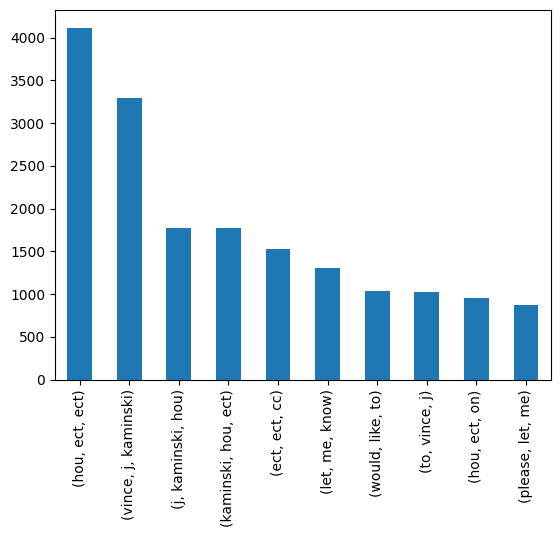

In [ ]:
bigram_freq = pd.Series([item for sublist in df['bigrams'] for item in sublist]).value_counts() #Q6
bigram_freq.head(10).plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Q7
def visualize_frequency_distribution(corpus, n=1, top_n_grams=50):

    ngram_freq_dist = nltk.FreqDist(ngrams(corpus, n))
    top_ngrams = list(zip(*list(ngram_freq_dist.most_common(top_n_grams))))[0]
    counts = Counter()
    for sentence in corpus:
        counts.update(ngrams(sentence, n))

    bar_data = [[counts[ngram]] for ngram in top_ngrams]
    plt.figure(figsize=(12, len(top_ngrams)*0.5))
    bar_plot = sns.barplot(top_ngrams, [count for count in bar_data], palette='muted')
    bar_plot.set_title(f'Freq Distribution of Top {top_n_grams} {n}-Grams')
    plt.xlabel('{}-Grams'.format(n))
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()